# Regularization

In [13]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from scipy.linalg import svd
import scipy.linalg as linalg
import matplotlib.pyplot as plt
import numpy as np

In [9]:
from utils import Event

In [10]:
from numpy.linalg import matrix_rank

In [3]:
n_features = 10
evt = Event(n_features=n_features, effective_rank=3, noise_level=1)

In [4]:
batch1_X, batch1_y = evt.sample(n_samples=100)
batch2_X, batch2_y = evt.sample(n_samples=200)

In [5]:
evt.coefficients

array([-1.11691642e+01,  9.10317582e+00, -5.39770192e+00,  1.59352145e+01,
        1.26414677e+01,  5.25637835e+00, -2.07429492e+01, -1.09958744e+01,
       -2.02460886e+00,  1.37467236e-02])

In [14]:
matrix_rank(batch1_X)

10

In [20]:
linalg.svdvals(batch1_X)

array([1.        , 0.902077  , 0.67061305, 0.42157524, 0.23962932,
       0.14060704, 0.09835715, 0.08307717, 0.07732722, 0.07419289])

## 1. effective_rank: the underlying factors of the dataset.

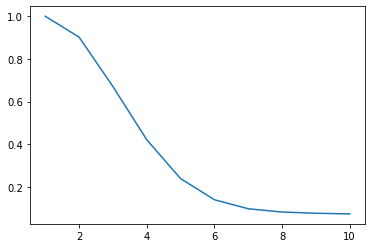

In [27]:
plt.plot(range(1, 11), linalg.svdvals(batch1_X))

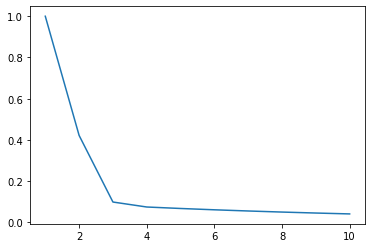

In [28]:
evt2 = Event(n_features=n_features, effective_rank=1, noise_level=1)
X, y = evt2.sample(n_samples=100)
plt.plot(range(1, 11), linalg.svdvals(X))

In [33]:
def bias(y, y_chap):
    return sum((y-y_chap) ** 2)

In [34]:
a = [1,2,3]
a

[1, 2, 3]

In [11]:
def compute_risk(model, evt, ntimes, n_samples, X0):
    pred_model = []
    for i in range(ntimes):
        X, y = evt.sample(n_samples)
        model.fit(X, y)
        pred = model.predict(X0)
        pred_model.append(pred)
    betas = evt.coefficients
    y0 = np.dot(X0, betas)
    bias = np.mean(pred_model - y0)
    var = np.var(pred_model)
    risk = np.mean((pred_model - y0)**2)
    return risk, var, bias

In [40]:
np.var([1,2,3])

0.6666666666666666

In [44]:
np.sqrt(2)/2

0.7071067811865476

In [45]:
np.dot([1,2,3], [1,2,3])

14

In [ ]:
compute_risk(LinearRegression(), evt, ntimes, n_samples, X0)

In [39]:
ntimes = 1000
n_samples = 100
X0 = np.random.randn(1, n_features)
X0

array([[-0.6593749 , -0.63752457,  0.88641547,  0.49274159,  0.3936153 ,
        -0.40870804,  0.36273948,  0.93537553,  0.27398677,  0.24636814]])

In [57]:
risk_lin, var_lin, bias_lin = compute_risk(LinearRegression(), evt, ntimes, n_samples, X0)

In [48]:
risk_ridge, var_ridge, bias_ridge = compute_risk(lin_result[i, 0], lin_result[i, 1], lin_result[i, 2] = compute_risk(LinearRegression(), evt, ntimes=ntimes, n_samples=n_samples, X0), evt, ntimes, n_samples, X0)

In [49]:
risk_lasso, var_lasso, bias_lasso = compute_risk(Lasso(), evt, ntimes, n_samples, X0)

In [61]:
lin = compute_risk(LinearRegression(), evt, ntimes, n_samples, X0)
ridge = compute_risk(Ridge(), evt, ntimes, n_samples, X0)
lasso = compute_risk(Lasso(), evt, ntimes, n_samples, X0)

In [63]:
for results in [lin, ridge, lasso]:
    output = "Risk: %f\tVariance: %f\tBias: %s"
    print(output % results)

Risk: 41.962542	Variance: 41.874421	Bias: 0.2968511886217732
Risk: 192.612055	Variance: 0.043441	Bias: 13.87690938510614
Risk: 119.166094	Variance: 0.062735	Bias: 10.913448517590066


In [64]:
from sklearn.linear_model import LassoCV, RidgeCV

In [65]:
model = LassoCV(cv=5)

##  Show the influence of the dataset’s effective rank on the 3 algorithms and interpret.


In [36]:
effective_ranks = range(0, 50)
n_features = 100
lin_result = np.zeros((len(effective_ranks), 3))
lasso_result = np.zeros((len(effective_ranks), 3))
ridge_result = np.zeros((len(effective_ranks), 3))
X0 = np.random.randn(1, n_features)
ntimes=100
n_samples=1000

for i, effective_rank in enumerate(effective_ranks):
    evt = Event(n_features=n_features, effective_rank=effective_rank+1, noise_level=1)
    lin_result[i, 0], lin_result[i, 1], lin_result[i, 2] = compute_risk(LinearRegression(), evt, ntimes, n_samples, X0)
    ridge_result[i, 0], ridge_result[i, 1], ridge_result[i, 2] = compute_risk(Ridge(), evt, ntimes, n_samples, X0)
    lasso_result[i, 0], lasso_result[i, 1], lasso_result[i, 2] = compute_risk(Lasso(), evt, ntimes, n_samples, X0)

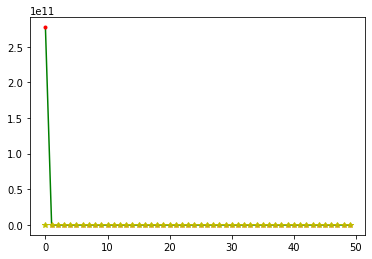

In [37]:
import matplotlib.pyplot as plt
plt.plot(effective_ranks, lin_result[:,0],'g-')
plt.plot(effective_ranks, lin_result[:,1], 'r.')
plt.plot(effective_ranks, lin_result[:,2], 'y*')

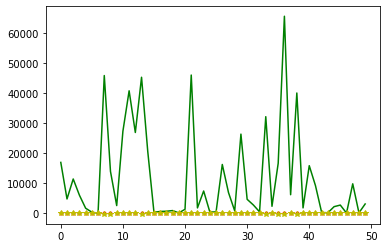

In [38]:
plt.plot(effective_ranks, lasso_result[:,0],'g-')
plt.plot(effective_ranks, lasso_result[:,1], 'r.')
plt.plot(effective_ranks, lasso_result[:,2], 'y*')

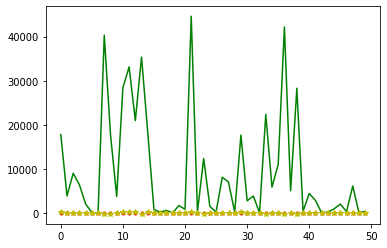

In [39]:
plt.plot(effective_ranks, ridge_result[:,0],'g-')
plt.plot(effective_ranks, ridge_result[:,1], 'r.')
plt.plot(effective_ranks, ridge_result[:,2], 'y*')